# <center>Lab session 9: Anonymous Communication</center> <center>computer section - Task 4 to 6</center>

In [ ]:
import numpy as np
import random
import socket
lowPrimes =   [3,5,7,11,13,17,19,23,29,31,37,41,43,47,53,59,61,67,71,73,79,83,89,97
                   ,101,103,107,109,113,127,131,137,139,149,151,157,163,167,173,179
                   ,181,191,193,197,199,211,223,227,229,233,239,241,251,257,263,269
                   ,271,277,281,283,293,307,311,313,317,331,337,347,349,353,359,367
                   ,373,379,383,389,397,401,409,419,421,431,433,439,443,449,457,461
                   ,463,467,479,487,491,499,503,509,521,523,541,547,557,563,569,571
                   ,577,587,593,599,601,607,613,617,619,631,641,643,647,653,659,661
                   ,673,677,683,691,701,709,719,727,733,739,743,751,757,761,769,773
                   ,787,797,809,811,821,823,827,829,839,853,857,859,863,877,881,883
                   ,887,907,911,919,929,937,941,947,953,967,971,977,983,991,997]


# TASK 4: Implement Chaum's protocol for the dining cryptographer's problems

In [56]:
import numpy as np
import matplotlib.pyplot as plt


In [71]:
0.81*3

2.43

In [65]:
for p in np.linspace(0.1,0.9,9):
    min_p = 1-p
    print(f"for p = {p}, Expected number of steps is {1/p}")
        

for p = 0.1, Expected number of steps is 10.0
for p = 0.2, Expected number of steps is 5.0
for p = 0.30000000000000004, Expected number of steps is 3.333333333333333
for p = 0.4, Expected number of steps is 2.5
for p = 0.5, Expected number of steps is 2.0
for p = 0.6, Expected number of steps is 1.6666666666666667
for p = 0.7000000000000001, Expected number of steps is 1.4285714285714284
for p = 0.8, Expected number of steps is 1.25
for p = 0.9, Expected number of steps is 1.1111111111111112


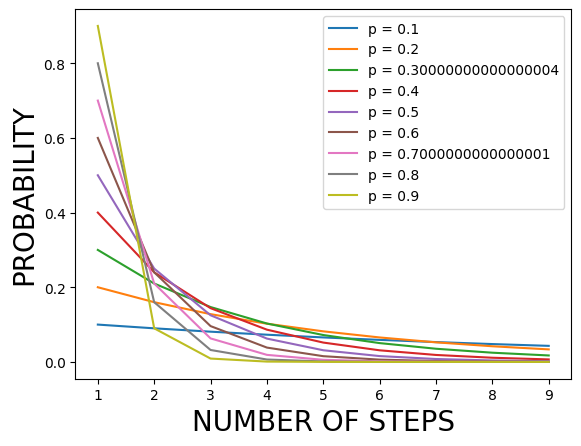

In [66]:
for p in np.linspace(0.1,0.9,9):
    min_p = 1-p
    y = []
    x = []
    for step in range(1,10):  
        result = pow(min_p, step-1)*p
        y.append(result)
        x.append(step)
    plt.plot(x, y, label=f"p = {p}")
plt.xlabel("NUMBER OF STEPS", fontsize = 20)
plt.ylabel("PROBABILITY", fontsize=20)
plt.legend()

### Party A and Party B agree on a one-bit secret 1

In [31]:
sAB = 1

### Party B and Party C agree on a one-bit secret 0

In [32]:
sBC = 0

### Party A and Party C agree on a one-bit secret 1

In [33]:
sAC = 1

In [34]:
sAD = 1

In [35]:
sBD = 0

In [36]:
sCD = 0

In [ ]:
sAC

### TO DO#1: for each Party, generate the 1-bit value they share publically, if no one paid

In [40]:
pA = sAB^sAC^sAD
pB = sAB^sBC^sBD
pC = sBC^sAC^sCD
pD = sAD^sBD^sCD

### TO DO #2: Calculate the public combination of their answers

In [41]:
paying_status = pA^pB^pC^pD
def check_payment(p):
    if p == 0:
        print(f"The status of the payment is {p}. THE DINER WAS NOT YET PAID.")
    else:
        print(f"The status of the payment is {p}. DINER IS PAID.")
check_payment(paying_status)

The status of the payment is 0. THE DINER WAS NOT YET PAID.


### TO DO #3: Party A has secretly paid. Change his shared answer and re-combine the public combination.

In [42]:
new_pA = not(sAB^sAC^sAD)
paying_status = new_pA^pB^pC^pD
check_payment(paying_status)

The status of the payment is 1. DINER IS PAID.


## In real-life, Chaum's protocol is used between a Prover and a Verifier, so that the Verifier gets to authenticate the Prover.

In [ ]:
p = lowPrimes[random.randint(0,20)]

### The prover generates prime $q$ so that $q = $min { k ∈ P: $k > 0$ and $(p-1)$ mod $k = 0$} (i.e. q is the smallest possible value bigger than 0 which divides p-1 evenly.)

In [ ]:
for q in range(3,24):
    if (p-1)%q == 0:
        break

### The prover generates $g$ and $h$ so that $g^q$ mod $p = 1$ and $h^q$ mod $p = 1$.

In [ ]:
nums = []
for i in range(1,10):
    if pow(i, q, p)==1:
        nums.append(i)
g = random.choice(nums)
h = random.choice(nums)

### The prover determines a secret $x$.

In [ ]:
x = 6

### The prover publishes publically $y_1$ and $y_2$ so that  $y_1 = g^x$ mod $p$ and $y_2 = h^x$ mod $p$.

In [ ]:
y1 = pow(g, x, p)
y2 = pow(h, x, p)

### Prover picks a random k.

In [ ]:
k = random.randint(0,10)

### Prover computes $r_1 = g^k$mod $p$ and $r_2 = h^k$mod $p$ and transmits those to the Challenger.

In [ ]:
r1 = pow(g, k, p)
r2 = pow(h, k, p)

### The Challenger now pick a random c and sends it to the Prover.

In [ ]:
c = random.randint(0,10)

### The Prover computes $s = (k-c*x)$mod $q$. 
##### Note: $x$mod $q$ always returns a value between $0$ and $q-1$

In [ ]:
s = (k - c * x) %q

### The Prover computes $g^s * y_1^c$mod $p$ and $h^s * y_2^c$mod $p$ and sends the results to the Challenger.

In [ ]:
result1 = (pow(g,s) * pow(y1,c)) % p
result2 = (pow(h,s) * pow(y2,c)) % p

### The Verifier checks that $r_1 == g^s * y_1^c$mod $p$ and $r_2 == h^s * y_2^c$mod $p$.

In [ ]:
r1 == result1

In [ ]:
r2 == result2

## The Prover has now shown to the Challenger that the Prover knows a secret $x$.

# TASK 5: Implement a proxy relaying messages $m_1$ from Alice to Bob, without and with  encryption.
### TO DO#4: Run the 3 scripts in the following order: 
#### 1. server.py (the proxy server relaying the messages)
#### 2. bob.py (bob receiving mesages from the proxy)
#### 3. alice.py (alice sending the messages to the proxy)

In [ ]:
m_1 = 'Hello, this is Alice!'

### Here is server.py

In [ ]:
import socket

# Define the IP address and port number to bind the server to
IP_ADDRESS = '127.0.0.1'  # Use 0.0.0.0 to bind to all available network
PORT = 5000

# Create a socket object and bind it to the IP address and port number
server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
server_socket.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 20)
server_socket.bind((IP_ADDRESS, PORT))

connected_clients = []

# Listen for incoming connections (up to 10 at a time)
server_socket.listen(10)
print(f'Server listening on {IP_ADDRESS}:{PORT}...')
start_time = time.time()
while (time.time() - start_time) < 60:
    # Accept an incoming connection
    client_socket, client_address = server_socket.accept()
    print(f'Accepted connection from {client_address}')

    # The first four bytes tell us what the client wants to do
    act = client_socket.recv(4).decode()
    if act == "send":
        print(f"Client {client_address} wants to send us a message")

        # Receive the rest
        # Note that the message can now be no longer than 1024 bytes; simple loop forever to fix (but you might need to detect it when the client quits, not sure how from the top of my head)
        message = client_socket.recv(1024)
        print(f"Client {client_address} message: '{message.decode()}'")

        # We don't need the sender anymore
        # NOTE: You might want to do this until the forwarding has completed if the sender has to be sure their message arrived successfully
        client_socket.close()

        # Forward the connection to all listening clients
        to_remove = []
        for i, (sock, addr) in enumerate(connected_clients):
            # This might error if the client quit along the way, hence the try/except
            print(f"Forwarding message to '{addr}'...")
            try:
                sock.send(message)
            except:
                print(f"Failed to forward message to {addr} (dropping client)")
                # Mark this entry as to-be-removed to avoid us forwarding it every time
                to_remove.append(i)

        # Remove all the disconnected clients
        for i in to_remove:
            connected_clients.pop(i)

    elif act == "recv":
        print(f"Client {client_address} wants to listen for messages")
        connected_clients.append((client_socket, client_address))

        # OK, we can continue now, the client stays connected as long as its loaded
        continue

    else:
        print(f"ERROR: Client {client_address} sent us unknown action '{act}' (aborting connection)")
        client_socket.close()
        continue

### Here is bob.py

In [ ]:
import socket

# Define the IP address and port number of the proxy server
PROXY_IP_ADDRESS = '127.0.0.1'  # Use the IP address of the proxy server
PROXY_PORT = 5000

# Connect to the proxy server
client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
client_socket.connect((PROXY_IP_ADDRESS, PROXY_PORT))
print(f'Connected to proxy server at {PROXY_IP_ADDRESS}:{PROXY_PORT}...')

# We send it that we wanna receive a message
client_socket.sendall("recv".encode())
print('Signaled to proxy Bob is a receiver.')

# Receive messages relayed by the proxy server
start_time = time.time()
while (time.time() - start_time) < 20:
    message = client_socket.recv(1024).decode()
    print(f'Received message: {message}')

# Close the client socket (this will never be reached in this example)
client_socket.close()

### Here is alice.py

In [ ]:
import socket

# Define the IP address and port number of the proxy server
PROXY_IP_ADDRESS = '127.0.0.1'  # Use the IP address of the proxy server
PROXY_PORT = 5000

# Connect to the proxy server
client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
client_socket.connect((PROXY_IP_ADDRESS, PROXY_PORT))
print(f'Connected to proxy server at {PROXY_IP_ADDRESS}:{PROXY_PORT}...')

# We send it that we wanna send a message
client_socket.sendall("send".encode())

# Send a message to the proxy server
message = 'Hello, this is Alice!'
client_socket.sendall(message.encode())
print(f'Sent message: {message}')

# Close the client socket
client_socket.close()


### TO DO #5: Modify the necessary scripts to implement RSA encryption of the messages betwen Alice and Bob (proxy server cannot decrypt them).

### TO DO #5a: Create "keys1" folders in the directory containing your scripts.

### TO DO #5b: Decide in which script to place the public key, and in which to place the private key

In [ ]:
def generateKeys(folder):
    (publicKey, privateKey) = rsa.newkeys(512)
    with open(folder +'/publicKey.pem', 'wb') as p:
        p.write(publicKey.save_pkcs1('PEM'))
    with open(folder +'/privateKey.pem', 'wb') as p:
        p.write(privateKey.save_pkcs1('PEM'))

In [ ]:
generateKeys("keys1")


In [ ]:
def generateKeys(folder):
    (publicKey, privateKey) = rsa.newkeys(512)
    with open(folder +'/publicKey.pem', 'wb') as p:
        p.write(publicKey.save_pkcs1('PEM'))
    with open(folder +'/privateKey.pem', 'wb') as p:
        p.write(privateKey.save_pkcs1('PEM'))

In [ ]:
generateKeys("keys1")


# TASK 6: Implement a padding mechanism to further protect messages $m_1$ and $m_2$.
### TO DO #6: Modify the necessary scripts to implement a padding mechanism for the messages.

In [ ]:
m1 = "This is a long long long long long long long long long \
long long long long long long long long long long long  message."
m2 = "This is an even longer longer longer longer longer longer longer longer \
longer longer longer longer longer longer longer longer longer longer longer \
longer longer longer longer longer longer longer longer longer longer longer \ 
longer longer longer longer longer longer longer longer longer longer message."